In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

C:\Users\olekh\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### najpierw jak po ludzku wygenerować sygnał

- fs = 100
- t od 0 do 10 co 1/fs
- x1 = amp 1 czest 11
- x2 = amp 1 czest 4 

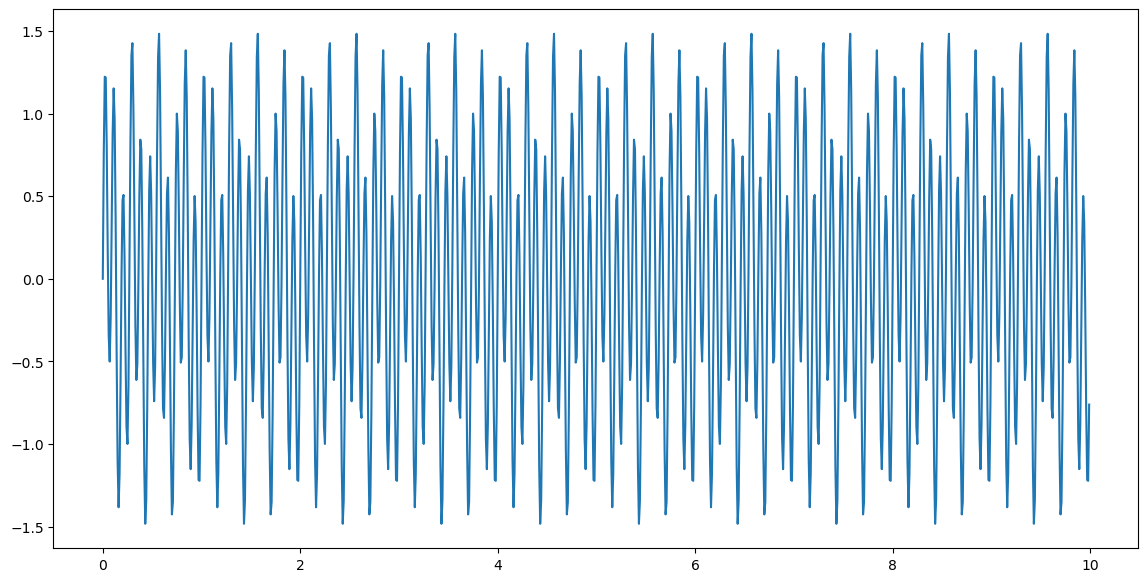

In [19]:
fs = 100
t = np.arange(0, 10, 1/fs)
x1 = np.sin(2*np.pi*11*t)
x2 = 0.5*np.sin(2*np.pi*4*t)
x = x1+x2
fig = plt.figure(figsize=(14,7))
plt.plot(t, x)

### Teraz policzyc fft i wa z pikami

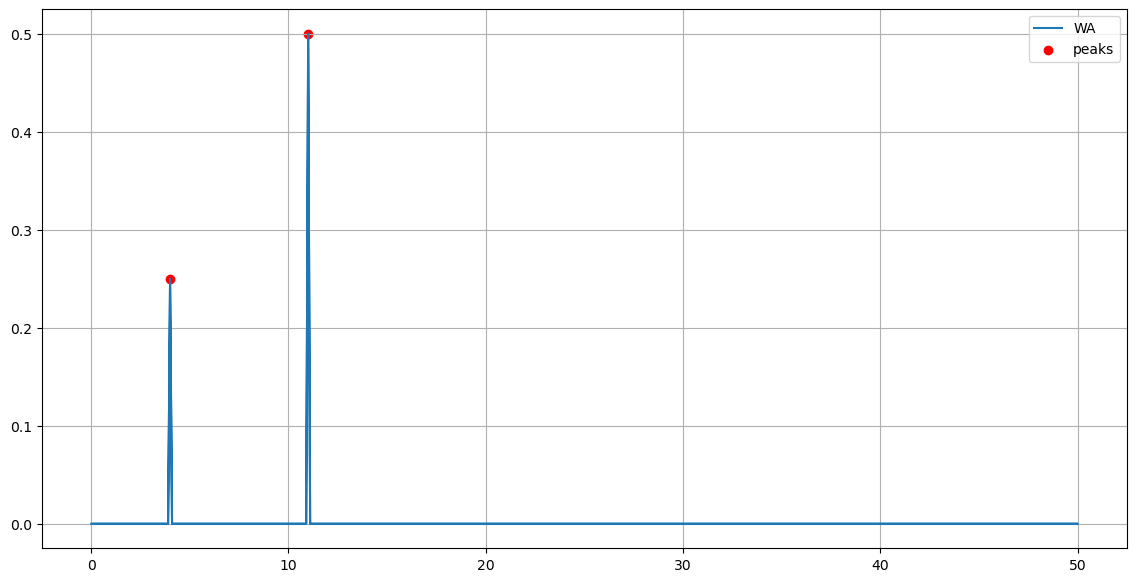

In [20]:
# fft
X = np.fft.fft(x)
magnitudes = np.abs(X) / len(X)
frequencies = np.fft.fftfreq(len(X), 1/fs)

# piki
peaks, _ = sp.signal.find_peaks(magnitudes[:len(magnitudes)//2], height=0.05)
plt.figure(figsize=(14,7))
plt.plot(np.abs(freq), np.abs(magnitudes), label='WA')
plt.scatter(frequencies[peaks], magnitudes[peaks], color='red', label='peaks')
plt.grid()
plt.legend()
plt.show()

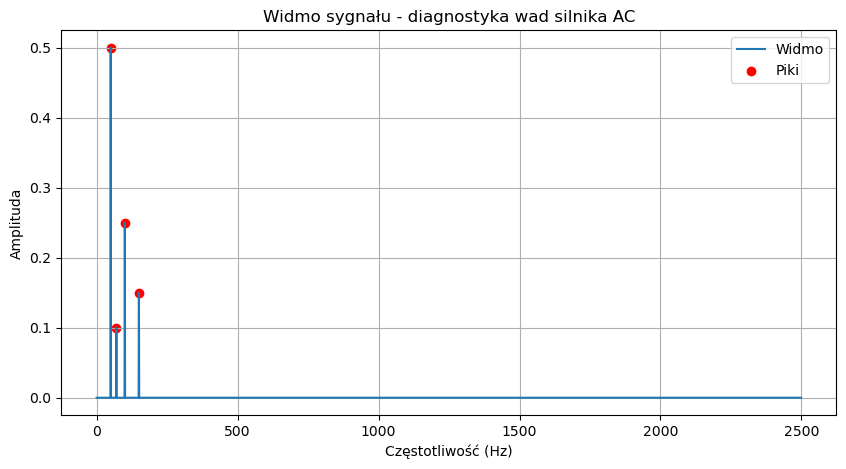

Zidentyfikowane piki częstotliwości: [ 50.  70. 100. 150.]


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Parametry sygnału
fs = 5000  # Częstotliwość próbkowania (Hz)
T = 1  # Czas trwania sygnału (s)
t = np.linspace(0, T, fs * T, endpoint=False)

# Częstotliwość obrotowa silnika
f_rot = 50  # Hz (np. 3000 RPM dla 2-biegunowego silnika)

# Sygnały odpowiadające różnym wadom
signal = np.sin(2 * np.pi * f_rot * t)  # Składowa podstawowa (praca normalna)
signal += 0.5 * np.sin(2 * np.pi * 2 * f_rot * t)  # Niewyważenie (2*f_rot)
signal += 0.3 * np.sin(2 * np.pi * 3 * f_rot * t)  # Luz mechaniczny (3*f_rot)
signal += 0.2 * np.sin(2 * np.pi * (f_rot + 20) * t)  # Uszkodzenie łożyska

# FFT
X = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(X), 1/fs)
amplitudes = np.abs(X) / len(X)

# Identyfikacja pików
peaks, _ = find_peaks(amplitudes[:len(amplitudes)//2], height=0.05)

# Wykres widma
plt.figure(figsize=(10, 5))
plt.plot(frequencies[:len(frequencies)//2], amplitudes[:len(amplitudes)//2], label="Widmo")
plt.scatter(frequencies[peaks], amplitudes[peaks], color='red', label="Piki")
plt.xlabel("Częstotliwość (Hz)")
plt.ylabel("Amplituda")
plt.title("Widmo sygnału - diagnostyka wad silnika AC")
plt.legend()
plt.grid()
plt.show()

# Wypisanie znalezionych pików
print("Zidentyfikowane piki częstotliwości:", frequencies[peaks])


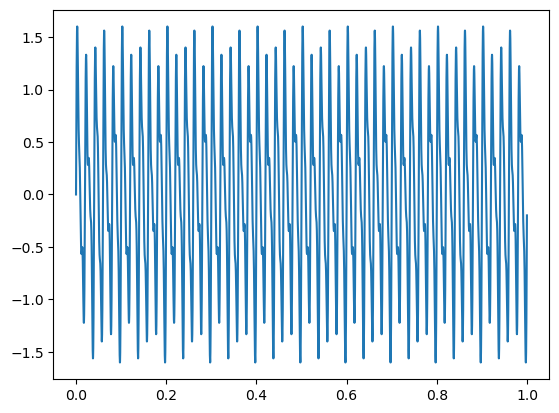

In [23]:
plt.plot(t, signal)